#### 1) I have chosen to use Simulated Annealing as my stochastic algorithm to optomise the function.
#### 2) I chose simulated annealing because it performs best when tasked with finding global minima when there are many local minimas. With the constraints presented, this seems like a great choice, especially since it is a known good general optomiser.
#### 3) For Random Search I decided to use a death penalty. This is because for this function, it is made clear that any solution must fall within certain constraints, therefore making it possible to disregard any solution not satisfying the constraints. We simply evaluate f(x) only with x values which are valid.
#### In simulated annealing, I adopted a static penalty function to help guide the algorithm towards the optimal solution whilst still allowing 'bad' options to be potentially picked (to combat local minima). This results in finding the global minima much more efficiently, as can be seen in the boxplot with the best value being picked up every time with 3000 evaluations of f(x).

In [1]:
import numpy as np
import scipy as sc
import numpy.random as random
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

In [2]:
def f(x):
    f.counter += 1
    return (x[0]**2)*x[1]*(2+x[2])

In [3]:
def g1(x):
    g1.counter += 1
    return (1-(((x[1]**3)*x[2])/(71785*x[0]**4)))

In [4]:
def g2(x):
    g2.counter += 1
    return (((4*(x[1]**2)-(x[0]*x[1]))/(12566*(x[1]*(x[0]**3))-(x[0]**4)))+(1/(5108*(x[0]**2)))-1)

In [5]:
def g3(x):
    g3.counter += 1
    return (1-(float(140.45*x[0]))/((x[1]**2)*x[2]))

In [6]:
def g4(x):
    g4.counter += 1
    return (((x[0]+x[1])/(1.5))-1)

In [7]:
def get_random_x(bounds):         
    return [bounds[d][0] + random.rand()*(bounds[d][1] - bounds[d][0]) for d in range(len(bounds))]

#### Random Search

In [8]:
def check_g(x):
    for g in [g1,g2,g3,g4]:
            if g(x) > 0:
                return False
    return True

In [9]:
#bounds = lower and upper bounds for each x variable
#repeats = the number of function evaluations to be performed
#f = the function to be optimized
def RS(repeats, f, seed, bounds):
    random.seed(seed)
    f.counter = 0
    for g in [g1,g2,g3,g4]:
        g.counter = 0
    
    #inititalise
    f_best = 9999.0
    
    for i in range(repeats):
        
        x = get_random_x(bounds)
        
        while not check_g(x):
            x = get_random_x(bounds)
            

        f_new = f(x)
        if f_new < f_best: 
            f_best = f_new
        
    return f_best  

#### Simulated Annealing

In [10]:
#ensure generated x is within the given bounds
def clip(x, bounds):
    for i in range(len(x)):
        if x[i] < bounds[i][0]:
            x[i] = bounds[i][0]
        if x[i] > bounds[i][1]:
            x[i] = bounds[i][1]
    return x

In [11]:
#edit by 10%
def multiVarDist(x_center, bounds):
    variances = np.array([bounds[d][1] - bounds[d][0] for d in range(len(bounds))]) * 0.1 #10 percent
    covMatrix = np.diag(variances)
    
    return random.multivariate_normal(x_center, covMatrix)

In [12]:
def SA(repeats, f, seed, bounds):
    random.seed(seed)
    f.counter = 0
    R = 10
    
    x_best = get_random_x(bounds)
    x_center = x_best
    
    #penalty
    g_sum = 0    
    for g in [g1, g2, g3, g4]:
        g_sum += R * max(0,g(x_best))
        
    f_best = f(x_best)
    f_best_penalty = f_best + g_sum
    f_center = f_best_penalty
    
    for k in range(1, repeats):   
        temp = 50 / k
        x_prime = clip(multiVarDist(x_center, bounds), bounds)
        
        #penalty
        g_sum = 0
        for g in [g1, g2, g3, g4]:
            g_sum += R * max(0,g(x_prime))
            
        f_new = f(x_prime)
        f_penalty = f_new + g_sum
        delta = (f_penalty - f_best_penalty)
         
        if delta <= 0 or random.rand() < min(math.exp((-delta)/temp),1):
            x_center = x_prime
            f_center = f_penalty
        if f_new < f_best:
            f_best = f_new
            f_best_penalty = f_penalty
            x_best = x_prime
        
    return f_best
        

In [13]:
def func_count():
    print("f func count:" + str(f.counter))
    i = 1
    for g in [g1,g2,g3,g4]:     
        print("g" + str(i) + " func count: " + str(g.counter))
        i += 1

#### Random Search gives a low range of results for the function, however Simulated Annealing appears to get the correct solution every time, suggesting that it has fully optomised the function. Random search clearly does not perform as well as Simulated Annealing in this regard, with the mean value of Random search much higher and with much higher variance.

#### Examining the number of times functions were called, Simulated Annealing does reveal itself to be more intensive with more calls to the contraints than Random Search. The benefit of the better results gained from Simulated Annealing far outweigh this minor drawback though.


attempt 1

Random Search
f func count:3000
g1 func count: 374348
g2 func count: 6408
g3 func count: 4139
g4 func count: 3000

Simulated Annealing
f func count:3000
g1 func count: 377348
g2 func count: 9408
g3 func count: 7139
g4 func count: 6000

attempt 2

Random Search
f func count:3000
g1 func count: 362180
g2 func count: 6357
g3 func count: 4165
g4 func count: 3000

Simulated Annealing
f func count:3000
g1 func count: 365180
g2 func count: 9357
g3 func count: 7165
g4 func count: 6000

attempt 3

Random Search
f func count:3000
g1 func count: 375613
g2 func count: 6643
g3 func count: 4166
g4 func count: 3000

Simulated Annealing
f func count:3000
g1 func count: 378613
g2 func count: 9643
g3 func count: 7166
g4 func count: 6000

attempt 4

Random Search
f func count:3000
g1 func count: 363867
g2 func count: 6435
g3 func count: 4189
g4 func count: 3000

Simulated Annealing
f func count:3000
g1 func count: 366867
g2 func count: 9435
g3 func count: 7189
g4 func count: 6000

attempt 5



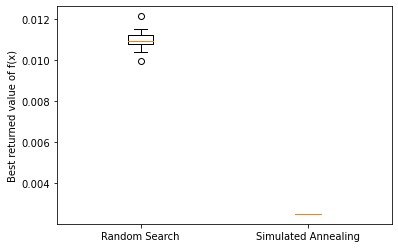

best result for RS -> 0.009957886981293719
best result for SA -> 0.0025000000000000005


In [14]:
bounds = np.array([[0.05,2],[0.25,1.3],[2,15]])
repeats = 3000
RS_results = []
SA_results = []

for i in range(21):
    print("")
    print("attempt " + str(i + 1))
    print("")
    print("Random Search")
    RS_results.append(RS(repeats, f, i, bounds))
    func_count()
    print("")
    print("Simulated Annealing")
    SA_results.append(SA(repeats, f, i, bounds))
    func_count()


plt.boxplot([RS_results, SA_results])
plt.xticks([1,2], ['Random Search', 'Simulated Annealing'])
plt.ylabel('Best returned value of f(x)')
plt.show()
    
RS_results.sort()
SA_results.sort()
print("best result for RS -> " + str(RS_results[0]))
print("best result for SA -> " + str(SA_results[0]))


